<a href="https://colab.research.google.com/github/jlee1998/Kernel-Flows-for-Irregular-Time-Series/blob/main/Kernel_Flows_for_Irregular_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

We first define the necessary kernel operations and functions which are used in kernel flows.

In [ ]:
import autograd.numpy as np
import math
#%% Kernel operations

# Returns the norm of the pairwise difference
def norm_matrix(matrix_1, matrix_2):
    norm_square_1 = np.sum(np.square(matrix_1), axis = 1)
    norm_square_1 = np.reshape(norm_square_1, (-1,1))
    
    norm_square_2 = np.sum(np.square(matrix_2), axis = 1)
    norm_square_2 = np.reshape(norm_square_2, (-1,1))
    
    d1=matrix_1.shape
    d2=matrix_2.shape
#    print(d1)
#    print(d2)
    if d1[1]!=d2[1]:
        matrix_1=np.transpose(matrix_1)
    
    inner_matrix = np.matmul(matrix_1, np.transpose(matrix_2))
    
    norm_diff = -2 * inner_matrix + norm_square_1 + np.transpose(norm_square_2)
#    print(norm_diff.shape)
    
    return norm_diff

# Returns the pairwise inner product
def inner_matrix(matrix_1, matrix_2):
    d1=matrix_1.shape
    d2=matrix_2.shape
    # print(d1)
    # print(d2)
    if d1[1]!=d2[1]:
        matrix_1=np.transpose(matrix_1)
    return np.matmul(matrix_1, np.transpose(matrix_2))


if __name__ == '__main__':
    print('This is the matrix operations file')

This is the matrix operations file


In [ ]:
""" In this section we define various kernels. Warning, not all of them work 
at the moment, the most reliable one is the RBF kernel. Note that currently the 
laplacian kernel does not work"""
        

# Define the RBF Kernel. Takes an array of parameters, returns a value
def kernel_RBF(matrix_1, matrix_2, parameters):
    matrix = norm_matrix(matrix_1, matrix_2)
    sigma = parameters[0]
    K =  np.exp(-matrix/(2*1.0**2))
    
    return K


# do not use right now
def kernel_laplacian(matrix_1, matrix_2, parameters):
    gamma = parameters[0]
    matrix = norm_matrix(matrix_1, matrix_2)
    K =  np.exp(-matrix * gamma)
    return K

def kernel_sigmoid(matrix_1, matrix_2, parameters):
    alpha = parameters[0]
    beta = parameters[1]
    matrix = inner_matrix(matrix_1, matrix_2)
    K = np.tanh(alpha *matrix + beta)
    return K

def kernel_rational_quadratic(matrix_1, matrix_2, parameters):
    alpha = parameters[0]
    beta = parameters[1]
    epsilon = 0.0001
    matrix = norm_matrix(matrix_1, matrix_2)
    return (beta**2 + matrix)**(-(alpha+ epsilon))

def kernel_inverse_power_alpha(matrix_1, matrix_2, parameters):
    alpha = parameters[0]
    beta = 1.0
    epsilon = 0.0001
    matrix = norm_matrix(matrix_1, matrix_2)
    return (beta**2 + matrix)**(-(alpha+ epsilon))

def kernel_inverse_multiquad(matrix_1, matrix_2, parameters):
    beta = parameters[0]
    gamma = parameters[1]
    matrix = norm_matrix(matrix_1, matrix_2)
    return (beta**2 + gamma*matrix)**(-1/2)

def kernel_cauchy(matrix_1, matrix_2, parameters):
    sigma = parameters[0]
    matrix = norm_matrix(matrix_1, matrix_2)
    return 1/(1 + matrix/sigma**2)

def kernel_quad(matrix_1, matrix_2, parameters):
    c = parameters[0]
    matrix = inner_matrix(matrix_1, matrix_2)
    K = (matrix+c) ** 2
    return K 

def kernel_poly(matrix_1, matrix_2, parameters):
    a = parameters[0]
    b = parameters[1]
    d = parameters[2]
    matrix = inner_matrix(matrix_1, matrix_2)
    K = (a * matrix + b) ** d
    return K 


def kernel_gaussian_linear(matrix_1, matrix_2, parameters):
    K = 0
    matrix = norm_matrix(matrix_1, matrix_2)
    for i in range(parameters.shape[1]):
        # print("beta", parameters[1, i])
        # print("sigma", parameters[0, i])
        K = K + parameters[1, i]**2*np.exp(-matrix / (2* parameters[0, i]**2))
    return K



def kernel_anl(matrix_1, matrix_2, parameters):
    matrix = norm_matrix(matrix_1, matrix_2)
    sigma = parameters[0]
    K =  np.exp(-matrix/ (2* sigma**2))
    K=K*(parameters[1])**2
    
    c = (parameters[2])**2
    matrix = inner_matrix(matrix_1, matrix_2)
    K = K+ (parameters[3])**2 *(matrix+c) ** 2
    
    beta = parameters[4]
    gamma = (parameters[5])**2
    matrix = norm_matrix(matrix_1, matrix_2)
    K=K+ (parameters[6])**2 *(beta**2 + gamma*matrix)**(-1/2)
    
    alpha = parameters[7]
    beta = parameters[8]
    matrix = norm_matrix(matrix_1, matrix_2)
    K=K+ (parameters[9])**2 *(beta**2 + matrix)**(-alpha)
    
    return K

def kernel_anl2(matrix_1, matrix_2, parameters):
    i=0
    
    matrix = norm_matrix(matrix_1, matrix_2)
    sigma = parameters[i+0]
    K =  np.exp(-matrix/ (2* sigma**2))
    K=K*(parameters[i+1])**2
    i=i+2
    
    
    c = (parameters[i])**2
    imatrix = inner_matrix(matrix_1, matrix_2)
    K = K+ (parameters[i+1])**2 *(imatrix+c) ** 2
    i=i+2
    
    beta = parameters[i]
    gamma = (parameters[i+1])**2
    K=K+ (parameters[i+2])**2 *(beta**2 + gamma*matrix)**(-1/2)
    i=i+3
    
    alpha = parameters[i]
    beta = parameters[i+1]
    K=K+ (parameters[i+2])**2 *(beta**2 + matrix)**(-alpha)
    i=i+3
    
    return K


def kernel_anl3(matrix_1, matrix_2, parameters):
    i=0
    
    matrix = norm_matrix(matrix_1, matrix_2)
    sigma = parameters[i+0]
    K =  np.exp(-matrix/ (2* sigma**2))
    K=K*(parameters[i+1])**2
    i=i+2
    
    
    c = (parameters[i])**2
    imatrix = inner_matrix(matrix_1, matrix_2)
    K = K+ (parameters[i+1])**2 *(imatrix+c) ** 2
    i=i+2
    
    beta = parameters[i]
    gamma = (parameters[i+1])**2
    K=K+ (parameters[i+2])**2 *(beta**2 + gamma*matrix)**(-1/2)
    i=i+3
    
    alpha = parameters[i]
    beta = parameters[i+1]
    K=K+ (parameters[i+2])**2 *(beta**2 + matrix)**(-alpha)
    i=i+3
    
    sigma = parameters[i]
    K=K+ (parameters[i+1])**2 * 1/(1 + matrix/sigma**2)
    i=i+2
    
    alpha_0 = parameters[i]
    sigma_0 = parameters[i+1]
    alpha_1 = parameters[i+2]
    sigma_1 = parameters[i+3]
    K =  K+ (parameters[i+4])**2 *alpha_0*np.maximum(0, 1-matrix/(sigma_0))+ alpha_1 * np.exp(-matrix/ (2* sigma_1**2))
    i=i+5
    
    p = parameters[i]
    l = parameters[i+1]
    sigma = parameters[i+2]
    K =K+ (parameters[i+3])**2 * np.exp(-np.sin(matrix*np.pi/p)**2/l**2)*np.exp(-matrix/sigma**2)
    i=i+4
    
    p = parameters[i]
    l = parameters[i+1]
    K = K+ (parameters[i+2])**2 *np.exp(-np.sin(matrix*np.pi/p)/l**2)
    i=i+3
    

    return K



"""A dictionnary containing the different kernels. If you wish to build a custom 
 kernel, add the function to the dictionnary.
"""
kernels_dic = {"RBF" : kernel_RBF,"poly": kernel_poly, "Laplacian": kernel_laplacian, 
               "sigmoid": kernel_sigmoid, "rational quadratic": kernel_rational_quadratic,
               "inverse_multiquad": kernel_inverse_multiquad, "quadratic" : kernel_quad,
               "poly": kernel_poly, "inverse_power_alpha": kernel_inverse_power_alpha,
               "gaussian multi": kernel_gaussian_linear, "anl": kernel_anl, "anl2": kernel_anl2,
               "anl3": kernel_anl3}


if __name__ == '__main__':
    print('This is the kernel file')

This is the kernel file


# Kernel Flows without Missing Data

The Henon map is a discrete dynamical system defined by:

$x_{n+1} = 1 - ax^2_n + y_n $

$y_{n+1} = bx_n $

Having simulated $x_n,y_n$ up to $n=2000$. To show that kernel flows works when there are no missing points in our training set, we first take regular samples of $x_n, y_n$ at $n=1,2,..,599$ as our training set, and then use it to predict the future of the dynamical system at times $n=600,...,2000$. The figure below shows the attractor of the Henon map with $a=1.4,b=0.3$, which is what we aim to reconstruct.

In [ ]:
def Henon(T, dt, N_sims,a,b):
    N_t  = int(T//dt)
    sims = np.zeros((N_sims, N_t, 2))
    for i in range(1,N_t):
      sims[:, i] = np.array([1-a*(1-a*sims[:,i-1,0]**2+sims[:,i-1,1])**2+b*sims[:,i-1,0],b*(1-a*sims[:,i-1,0]**2+sims[:,i-1,1])]).T
    return sims.astype(np.float32)

In [ ]:
# generate dataset
Data = Henon(T=200, dt=0.1,N_sims=1,a=1.4,b=0.3)[0]
#train test split
observed_data= Data[0::2]
train_data = Data[:600,:].T
test_data = Data[600:,:].T
#times
Times = np.linspace(1,2000-1,2000-1)
#take random subset
indices_random = np.sort(np.random.choice(600,300,replace=False))
#take train points corresponding to subset indices
#train_times = Times[indices_random]
#train_data = Data[:600,:]
#train_data = train_data[indices_random,:].T

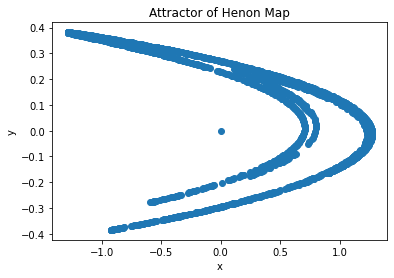

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Data[:,0],Data[:,1])
plt.title("Attractor of Henon Map")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

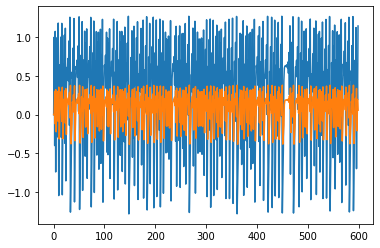

In [ ]:
plt.plot(train_data.T)

parameters  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Warning, rho outside [0,1]:  21.22695247421915
Warning, rho outside [0,1]:  1.3353379773842993
Warning, rho outside [0,1]:  1.5418825531859381
Warning, rho outside [0,1]:  1.8281201987531541
Warning, rho outside [0,1]:  1.253410950955604
Warning, rho outside [0,1]:  1.012871671166379
Warning, rho outside [0,1]:  1.1490650899457335
Warning, rho outside [0,1]:  1.3540725899785138
Warning, rho outside [0,1]:  1.2066079695823206
Warning, rho outside [0,1]:  1.3445973225100811
Warning, rho outside [0,1]:  1.8840923323538314
Warning, rho outside [0,1]:  1.8858482047963492
Warning, rho outside [0,1]:  1.434701061656367
Warning, rho outside [0,1]:  1.0854924236380237
Warning, rho outside [0,1]:  1.166356473471218
Warning, rho outside [0,1]:  9.336570587311817
Warning, rho outside [0,1]:  5.128946095936699
Warning, rho outside [0,1]:  2.0237980869437475
Warning, rho outside [0,1]:  1.456686111037623
Warning, r

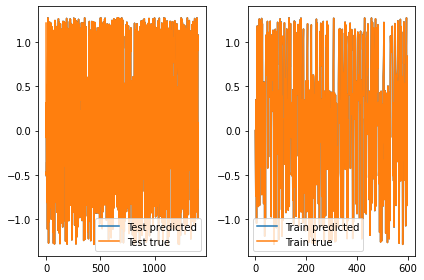

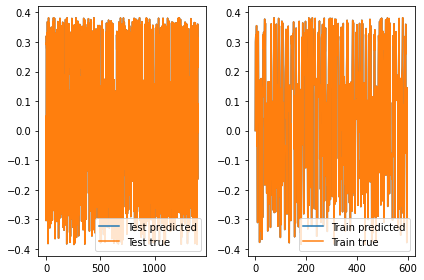

In [ ]:
np.random.seed(1)
from autograd import value_and_grad 
import math
import matplotlib.pyplot as plt
def sample_selection(data, size):
  indices = np.arange(data.shape[0])
  sample_indices = np.sort(np.random.choice(indices, size, replace= False)) 
  return sample_indices

def batch_creation(data, batch_size, sample_proportion = 0.5):
  if batch_size == False:
    data_batch = data
    batch_indices = np.arange(data.shape[0])
  elif 0 < batch_size <= 1:
    batch_size = int(data.shape[0] * batch_size)
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
  else:
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
        

    # Sample from the mini-batch
  sample_size = math.ceil(data_batch.shape[0]*sample_proportion)
  sample_indices = sample_selection(data_batch, sample_size)
    
  return sample_indices, batch_indices


# Generate a prediction
def kernel_regression(X_train, X_test, Y_train, param, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    t_matrix = kernel(X_test, X_train, param) 
    prediction = np.matmul(t_matrix, np.matmul(np.linalg.inv(k_matrix), Y_train)) 
    return prediction

# redicttimeseries

def kernel_extrapolate(X_train, X_test, Y_train, param, nsteps=1, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y_train)
    arr = np.array([])
    
    X_test0=X_test
    isteps=int(nsteps/(X_test.shape[1]))+1
    for i in range(isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, X_train, param) 
        prediction = np.matmul(t_matrix, A) 
        X_test0=prediction
        arr = np.append(arr, np.array(prediction[0,:]))
    arr=arr[0:nsteps]
    return arr


def replace_nan(array):
    for i in range(array.shape[0]):
        if math.isnan(array[i]) == True:
            print("Found nan value, replacing by 0")
            array[i] = 0
    return array

def sample_size_linear(iterations, range_tuple):
    
    return np.linspace(range_tuple[0], range_tuple[1], num = iterations)[::-1]
            
#%% Rho function

# The pi or selection matrix
def pi_matrix(sample_indices, dimension):
    pi = np.zeros(dimension)
    
    for i in range(dimension[0]):
        pi[i][sample_indices[i]] = 1
    
    return pi


def rho(parameters, matrix_data, Y_data, sample_indices,  kernel_keyword= "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    
    kernel_matrix = kernel(matrix_data, matrix_data, parameters)
#    print(kernel_matrix.shape)
    pi = pi_matrix(sample_indices, (sample_indices.shape[0], matrix_data.shape[0]))   
#    print(pi.shape)
    
    sample_matrix = np.matmul(pi, np.matmul(kernel_matrix, np.transpose(pi)))
#    print(sample_matrix.shape)
    
    Y_sample = Y_data[sample_indices]
#    print(Y_sample.shape)
    
    lambda_term = regu_lambda
    inverse_data = np.linalg.inv(kernel_matrix + lambda_term * np.identity(kernel_matrix.shape[0]))
    inverse_sample = np.linalg.inv(sample_matrix + lambda_term * np.identity(sample_matrix.shape[0]))
#    print(inverse_sample.shape)
#    B=np.matmul(inverse_sample, Y_sample)
#    print(B.shape)
    
    top = np.tensordot(Y_sample, np.matmul(inverse_sample, Y_sample))
    
   
    bottom = np.tensordot(Y_data, np.matmul(inverse_data, Y_data))
    
    #print(1-top/bottom)
    return 1 - top/bottom




def l2(parameters, matrix_data, Y, batch_indices, sample_indices, kernel_keyword = "RBF"):
    X_sample = matrix_data[sample_indices]
    Y_sample = Y[sample_indices]
    
    not_sample = [x for x in batch_indices not in sample_indices]
    X_not_sample = matrix_data[not_sample]
    Y_not_sample = Y[not_sample]
    prediction = kernel_regression(X_sample, X_not_sample, Y_sample, kernel_keyword)
    
    return np.dot(Y_not_sample - prediction, Y_not_sample- prediction)

#%% Grad functions

""" We define the gradient calculator function.Like rho, the gradient 
calculator function accesses the gradfunctions via a keyword"""

# Gradient calculator function. Returns an array
def grad_kernel(parameters, X_data, Y_data, sample_indices, kernel_keyword= "RBF", regu_lambda = 0.000001):
    grad_K = value_and_grad(rho)
    rho_value, gradient = grad_K(parameters, X_data, Y_data, sample_indices, kernel_keyword, regu_lambda = regu_lambda)
    return rho_value, gradient

#%% The class version of KF
class KernelFlowsP():
    
    def __init__(self, kernel_keyword, parameters):
        self.kernel_keyword = kernel_keyword
        self.parameters = np.copy(parameters)
        
        # Lists that keep track of the history of the algorithm
        self.rho_values = []
        self.grad_hist = []
        self.para_hist = []
        
        self.LR = 0.1
        self.beta = 0.9
        self.regu_lambda = 0.0001
    
    def get_hist(self):
        return self.param_hist, self.gradients, self.rho_values
        
    
    def save_model(self):
        np.save("param_hist", self.param_hist)
        np.save("gradients", self.gradients)
        np.save("rho_values", self.rho_values)
        
    def get_parameters(self):
        return self.parameters
    
    def set_LR(self, value):
        self.LR = value
        
    def set_beta(self, value):
        self.beta = value
    def set_train(self, train):
        self.train = train
        
    
    def fit(self, X, Y, iterations, batch_size = False, optimizer = "SGD", 
            learning_rate = 0.1, beta = 0.9, show_it = 100, regu_lambda = 0.000001, 
            adaptive_size = False, adaptive_range = (), proportion = 0.5, reduction_constant = 0.0):            

        self.set_LR(learning_rate)
        self.set_beta(beta)
        self.regu_lambda = regu_lambda
        
        self.X_train = np.copy(X)
        self.Y_train = np.copy(Y)
        momentum = np.zeros(self.parameters.shape, dtype = "float")
        
        # This is used for the adaptive sample decay
        rho_100 = []
        adaptive_mean = 0
        adaptive_counter = 0
        
        if adaptive_size == False or adaptive_size == "Dynamic":
            sample_size = proportion
        elif adaptive_size == "Linear":
            sample_size_array = sample_size_linear(iterations, adaptive_range) 
        else:
            print("Sample size not recognized")
            
        for i in range(iterations-1):
            if i % show_it == 0:
                print("parameters ", self.parameters)
            
            if adaptive_size == "Linear":
                sample_size = sample_size_array[i]
                
            elif adaptive_size == "Dynamic" and adaptive_counter == 100:
                if adaptive_mean != 0:
                    change = np.mean(rho_100) - adaptive_mean 
                else:
                    change = 0
                adaptive_mean = np.mean(rho_100)
                rho_100 = []
                sample_size += change - reduction_constant
                adaptive_counter= 0
                
            # Create a batch and a sample
            #print(X.shape)
            sample_indices, batch_indices = batch_creation(X, batch_size, sample_proportion = sample_size)
            X_data = X[batch_indices]
            Y_data = Y[batch_indices]
            

                
            # Changes parameters according to SGD rules
            if optimizer == "SGD":
                rho, grad_mu = grad_kernel(self.parameters, X_data, Y_data, 
                                           sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                #print(grad_mu)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    self.parameters -= learning_rate * grad_mu 
                    #* (Times[i]-train_times[i])
                    
            
            # Changes parameters according to Nesterov Momentum rules     
            elif optimizer == "Nesterov":
                rho, grad_mu = grad_kernel(self.parameters - learning_rate * beta * momentum, 
                                               X_data, Y_data, sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    momentum = beta * momentum + grad_mu
                    self.parameters -= learning_rate * momentum * (train_times[i]-train_times[i-1])
                
            else:
                print("Error optimizer, name not recognized")
            
            # Update history 
            self.para_hist.append(np.copy(self.parameters))
            self.rho_values.append(rho)
            self.grad_hist.append(np.copy(grad_mu))
            
            rho_100.append(rho)
            adaptive_counter +=1
                
            
        # Convert all the lists to np arrays
        self.para_hist = np.array(self.para_hist) 
        self.rho_values = np.array(self.rho_values)
        self.grad_hist = np.array(self.grad_hist)
                
        return self.parameters
    
    def predict(self,test, regu_lambda = 0.0000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_regression(X_train, test, Y_train, self.parameters, self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

    def extrapolate(self,test, nsteps=1,regu_lambda = 0.000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_extrapolate(X_train, test, Y_train, self.parameters, nsteps,self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

def fit_data_anl3(train_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=train_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "SGD",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def fit_error_model_anl3(train_data,error_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=error_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "Nesterov",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def test_fit_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T

def test_error_model_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T



if __name__ == '__main__':

    # Set delay
    delay = 1
    regu_lambda = 0.0000001
    noptsteps = 1000

    # Fit on training data
    k_matrix, A, param, normalize, train_X = fit_data_anl3(train_data,delay,regu_lambda,noptsteps)

    # Predict and get error on training data
    predicted_train = test_fit_anl3(train_data, train_X, delay, k_matrix, A, param, normalize)

    # Predict testing data
    predicted_test = test_fit_anl3(test_data, train_X, delay, k_matrix, A, param, normalize)
    test_error = np.abs(predicted_test-test_data)

    # Visualize the modal predictions
    for mode_num in range(2):
        fig, ax = plt.subplots(nrows=1,ncols=2)
        ax[0].plot(predicted_test[mode_num,:],label='Test predicted')
        ax[0].plot(test_data[mode_num,:],label='Test true')
        ax[0].legend()

        ax[1].plot(predicted_train[mode_num,:],label='Train predicted')
        ax[1].plot(train_data[mode_num,:],label='Train true')
        ax[1].legend()
        plt.tight_layout()
        plt.show()


Text(0, 0.5, 'y')

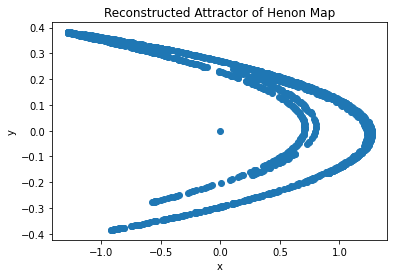

In [ ]:
plt.scatter(predicted_test[0,:],predicted_test[1,:])
plt.title("Reconstructed Attractor of Henon Map")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
predicted_test

array([[ 1.00000003, -0.74088638,  0.99718773, ...,         nan,
                nan,         nan],
       [ 0.        ,  0.3228    ,  0.10426548, ...,         nan,
                nan,         nan]])

# Kernel Flows with Missing Data

When we attempt to use the kernel flows algorithm with missing data, the algorithm fails to work as above. For now, we shall see what happens if the missing data happens at regular intervals:

We sample the points $x_n, y_n$ at $n=1,3,5,..,599$ as our training set, and then use it to predict $x_n,y_n$ at times $n=600,601,602,...,1998,1999,2000$.

In [ ]:
# generate dataset
Data = Henon(T=200, dt=0.1,N_sims=1,a=1.4,b=0.3)[0]
#train test split
observed_data= Data[0::2]
train_data = observed_data[:300,:].T
test_data = Data[:600,:].T
#times
Times = np.linspace(1,2000-1,2000-1)
#take random subset
indices_random = np.sort(np.random.choice(600,300,replace=False))
#take train points corresponding to subset indices
#train_times = Times[indices_random]
#train_data = Data[:600,:]
#train_data = train_data[indices_random,:].T

In [ ]:
np.random.seed(1)
from autograd import value_and_grad 
import math
import matplotlib.pyplot as plt
def sample_selection(data, size):
  indices = np.arange(data.shape[0])
  sample_indices = np.sort(np.random.choice(indices, size, replace= False)) 
  return sample_indices

def batch_creation(data, batch_size, sample_proportion = 0.5):
  if batch_size == False:
    data_batch = data
    batch_indices = np.arange(data.shape[0])
  elif 0 < batch_size <= 1:
    batch_size = int(data.shape[0] * batch_size)
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
  else:
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
        

    # Sample from the mini-batch
  sample_size = math.ceil(data_batch.shape[0]*sample_proportion)
  sample_indices = sample_selection(data_batch, sample_size)
    
  return sample_indices, batch_indices


# Generate a prediction
def kernel_regression(X_train, X_test, Y_train, param, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    t_matrix = kernel(X_test, X_train, param) 
    prediction = np.matmul(t_matrix, np.matmul(np.linalg.inv(k_matrix), Y_train)) 
    return prediction

# redicttimeseries

def kernel_extrapolate(X_train, X_test, Y_train, param, nsteps=1, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y_train)
    arr = np.array([])
    
    X_test0=X_test
    isteps=int(nsteps/(X_test.shape[1]))+1
    for i in range(isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, X_train, param) 
        prediction = np.matmul(t_matrix, A) 
        X_test0=prediction
        arr = np.append(arr, np.array(prediction[0,:]))
    arr=arr[0:nsteps]
    return arr


def replace_nan(array):
    for i in range(array.shape[0]):
        if math.isnan(array[i]) == True:
            print("Found nan value, replacing by 0")
            array[i] = 0
    return array

def sample_size_linear(iterations, range_tuple):
    
    return np.linspace(range_tuple[0], range_tuple[1], num = iterations)[::-1]
            
#%% Rho function

# The pi or selection matrix
def pi_matrix(sample_indices, dimension):
    pi = np.zeros(dimension)
    
    for i in range(dimension[0]):
        pi[i][sample_indices[i]] = 1
    
    return pi


def rho(parameters, matrix_data, Y_data, sample_indices,  kernel_keyword= "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    
    kernel_matrix = kernel(matrix_data, matrix_data, parameters)
#    print(kernel_matrix.shape)
    pi = pi_matrix(sample_indices, (sample_indices.shape[0], matrix_data.shape[0]))   
#    print(pi.shape)
    
    sample_matrix = np.matmul(pi, np.matmul(kernel_matrix, np.transpose(pi)))
#    print(sample_matrix.shape)
    
    Y_sample = Y_data[sample_indices]
#    print(Y_sample.shape)
    
    lambda_term = regu_lambda
    inverse_data = np.linalg.inv(kernel_matrix + lambda_term * np.identity(kernel_matrix.shape[0]))
    inverse_sample = np.linalg.inv(sample_matrix + lambda_term * np.identity(sample_matrix.shape[0]))
#    print(inverse_sample.shape)
#    B=np.matmul(inverse_sample, Y_sample)
#    print(B.shape)
    
    top = np.tensordot(Y_sample, np.matmul(inverse_sample, Y_sample))
    
   
    bottom = np.tensordot(Y_data, np.matmul(inverse_data, Y_data))
    
    #print(1-top/bottom)
    return 1 - top/bottom

def l2(parameters, matrix_data, Y, batch_indices, sample_indices, kernel_keyword = "RBF"):
    X_sample = matrix_data[sample_indices]
    Y_sample = Y[sample_indices]
    
    not_sample = [x for x in batch_indices not in sample_indices]
    X_not_sample = matrix_data[not_sample]
    Y_not_sample = Y[not_sample]
    prediction = kernel_regression(X_sample, X_not_sample, Y_sample, kernel_keyword)
    
    return np.dot(Y_not_sample - prediction, Y_not_sample- prediction)

#%% Grad functions

""" We define the gradient calculator function.Like rho, the gradient 
calculator function accesses the gradfunctions via a keyword"""

# Gradient calculator function. Returns an array
def grad_kernel(parameters, X_data, Y_data, sample_indices, kernel_keyword= "RBF", regu_lambda = 0.000001):
    grad_K = value_and_grad(rho)
    rho_value, gradient = grad_K(parameters, X_data, Y_data, sample_indices, kernel_keyword, regu_lambda = regu_lambda)
    return rho_value, gradient

#%% The class version of KF
class KernelFlowsP():
    
    def __init__(self, kernel_keyword, parameters):
        self.kernel_keyword = kernel_keyword
        self.parameters = np.copy(parameters)
        
        # Lists that keep track of the history of the algorithm
        self.rho_values = []
        self.grad_hist = []
        self.para_hist = []
        
        self.LR = 0.1
        self.beta = 0.9
        self.regu_lambda = 0.0001
    
    def get_hist(self):
        return self.param_hist, self.gradients, self.rho_values
        
    
    def save_model(self):
        np.save("param_hist", self.param_hist)
        np.save("gradients", self.gradients)
        np.save("rho_values", self.rho_values)
        
    def get_parameters(self):
        return self.parameters
    
    def set_LR(self, value):
        self.LR = value
        
    def set_beta(self, value):
        self.beta = value
    def set_train(self, train):
        self.train = train
        
    
    def fit(self, X, Y, iterations, batch_size = False, optimizer = "SGD", 
            learning_rate = 0.1, beta = 0.9, show_it = 100, regu_lambda = 0.000001, 
            adaptive_size = False, adaptive_range = (), proportion = 0.5, reduction_constant = 0.0):            

        self.set_LR(learning_rate)
        self.set_beta(beta)
        self.regu_lambda = regu_lambda
        
        self.X_train = np.copy(X)
        self.Y_train = np.copy(Y)
        momentum = np.zeros(self.parameters.shape, dtype = "float")
        
        # This is used for the adaptive sample decay
        rho_100 = []
        adaptive_mean = 0
        adaptive_counter = 0
        
        if adaptive_size == False or adaptive_size == "Dynamic":
            sample_size = proportion
        elif adaptive_size == "Linear":
            sample_size_array = sample_size_linear(iterations, adaptive_range) 
        else:
            print("Sample size not recognized")
            
        for i in range(iterations-1):
            if i % show_it == 0:
                print("parameters ", self.parameters)
            
            if adaptive_size == "Linear":
                sample_size = sample_size_array[i]
                
            elif adaptive_size == "Dynamic" and adaptive_counter == 100:
                if adaptive_mean != 0:
                    change = np.mean(rho_100) - adaptive_mean 
                else:
                    change = 0
                adaptive_mean = np.mean(rho_100)
                rho_100 = []
                sample_size += change - reduction_constant
                adaptive_counter= 0
                
            # Create a batch and a sample
            sample_indices, batch_indices = batch_creation(X, batch_size, sample_proportion = sample_size)
            X_data = X[batch_indices]
            Y_data = Y[batch_indices]
            

                
            # Changes parameters according to SGD rules
            if optimizer == "SGD":
                rho, grad_mu = grad_kernel(self.parameters, X_data, Y_data, 
                                           sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                #print(grad_mu)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    self.parameters -= learning_rate * grad_mu 
                    #* (Times[i]-train_times[i])
                    
            
            # Changes parameters according to Nesterov Momentum rules     
            elif optimizer == "Nesterov":
                rho, grad_mu = grad_kernel(self.parameters - learning_rate * beta * momentum, 
                                               X_data, Y_data, sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    momentum = beta * momentum + grad_mu
                    self.parameters -= learning_rate * momentum * (train_times[i]-train_times[i-1])
                
            else:
                print("Error optimizer, name not recognized")
            
            # Update history 
            self.para_hist.append(np.copy(self.parameters))
            self.rho_values.append(rho)
            self.grad_hist.append(np.copy(grad_mu))
            
            rho_100.append(rho)
            adaptive_counter +=1
                
            
        # Convert all the lists to np arrays
        self.para_hist = np.array(self.para_hist) 
        self.rho_values = np.array(self.rho_values)
        self.grad_hist = np.array(self.grad_hist)
                
        return self.parameters
    
    def predict(self,test, regu_lambda = 0.0000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_regression(X_train, test, Y_train, self.parameters, self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

    def extrapolate(self,test, nsteps=1,regu_lambda = 0.000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_extrapolate(X_train, test, Y_train, self.parameters, nsteps,self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

def fit_data_anl3(train_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=train_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "SGD",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def fit_error_model_anl3(train_data,error_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=error_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "Nesterov",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def test_fit_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T

def test_error_model_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T




if __name__ == '__main__':
    #train_data = np.load('POD_Coeffs_train.npy')
    #test_data = np.load('POD_Coeffs_test.npy')

    # Set delay
    delay = 2
    regu_lambda = 1000
    noptsteps = 5000
    #noptsteps = len(train_times)

    #t2 = Data[:600,:].T


    # Fit on training data
    k_matrix, A, param, normalize, train_X = fit_data_anl3(train_data,delay,regu_lambda,noptsteps)

    # Predict and get error on training data
    predicted_train = test_fit_anl3(train_data, train_X, delay, k_matrix, A, param, normalize)


    #np.save('RKHS_Train_Prediction.npy',predicted_train)
    #train_error = np.abs(predicted_train-train_data)
    #np.save('RKHS_Train_Error.npy',train_error)
    #test_data= Data[:600,:].T

    # Predict testing data
    predicted_test = test_fit_anl3(test_data, train_X, delay, k_matrix, A, param, normalize)
    #np.save('RKHS_Test_Prediction.npy',predicted_test)
    #test_error = np.abs(predicted_test-test_data)
   # np.save('RKHS_Test_Error.npy',train_error)

    # Visualize the modal predictions
    for mode_num in range(2):
        fig, ax = plt.subplots(nrows=1,ncols=2)
        ax[0].plot(predicted_test[mode_num,:],label='Test predicted')
        ax[0].plot(test_data[mode_num,:],label='Test true')
        ax[0].legend()

        ax[1].plot(predicted_train[mode_num,:],label='Train predicted')
        ax[1].plot(train_data[mode_num,:],label='Train true')
        ax[1].legend()
        plt.tight_layout()
        plt.show()

    #exit()

    # Fit an error model
    #k_matrix_err, A_err, param_err, normalize_err, train_X_err = fit_error_model_anl3(train_data,train_error,delay,regu_lambda,noptsteps)

    # Predict the error on train data
    #predicted_train_error = test_error_model_anl3(train_data, train_X_err, 
    #                                    delay, k_matrix_err, A_err, param_err, normalize_err)

    # Predict the error on test data
    #predicted_test_error = test_error_model_anl3(test_data, train_X_err, 
    #                                    delay, k_matrix_err, A_err, param_err, normalize_err)

Text(0, 0.5, 'y')

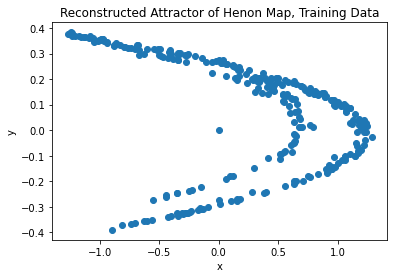

In [ ]:
plt.scatter(predicted_train[0,:],predicted_train[1,:])
plt.title("Reconstructed Attractor of Henon Map, Training Data")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

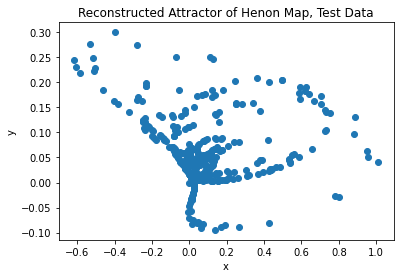

In [ ]:
plt.scatter(predicted_test[0,:],predicted_test[1,:])
plt.title("Reconstructed Attractor of Henon Map, Test Data")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
res = np.array(list(set(map(tuple, test_data.T)) - set(map(tuple, train_data.T)))).T


In [ ]:
res.shape

(2, 300)

Unsurprisingly, the same problem occurs when the missingness occurs at irregular intervals:

We take a random sample of 300 points $(x_i, y_i)$ where $i \in {1,...,600}$ as our training set, and then use it to predict $(x_n,y_n)$ at times $n=600,601,602,...,1998,1999,2000$.

In [ ]:
# generate dataset
Data = Henon(T=200, dt=0.1,N_sims=1,a=1.4,b=0.3)[0]
#train test split
test_data = Data[:600,:].T
#times
Times = np.linspace(1,2000-1,2000-1)
#take random subset
indices_random = np.sort(np.random.choice(600,300,replace=False))
#take train points corresponding to subset indices
train_times = Times[indices_random]
train_temp = Data[:600,:]
train_data = train_temp[indices_random,:].T


parameters  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
parameters  [1.00908971 1.02606262 1.09551516 1.06098595 0.98984044 0.99473922
 1.03025587 0.99509264 0.98237016 1.02415633 1.00678498 1.02387475
 1.00666188 1.00451139 1.01286489 1.00891599 1.01328027 0.99806446
 1.00102392 1.00697716 1.01833923 1.02377785 0.99406242 1.04122501]
parameters  [1.01388237 1.04279796 1.17269716 1.11044127 0.98247504 0.99198946
 1.04948192 0.99280894 0.96872352 1.04049598 1.010092   1.03960688
 1.01148399 1.00626196 1.02095364 1.01348227 1.02283961 0.99695552
 1.00028794 1.01112367 1.03300083 1.05999132 0.98837169 1.07066696]
parameters  [1.01853591 1.05788448 1.26019447 1.16097289 0.97569757 0.98935844
 1.0669518  0.99078767 0.95596131 1.05545851 1.01316249 1.05371188
 1.01557859 1.0081511  1.02813374 1.0178067  1.03092255 0.99487118
 0.99924973 1.01513677 1.04662122 1.10640076 0.97758932 1.10152284]
parameters  [1.02016626 1.06720145 1.31855233 1.1971175  0.97083682 0.9

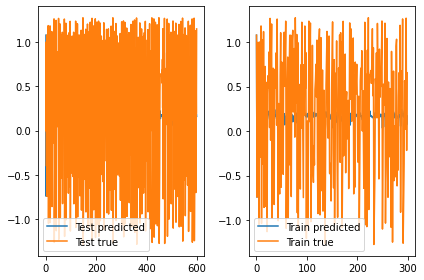

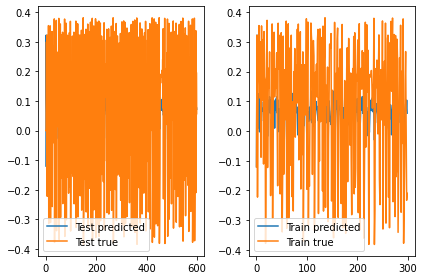

In [ ]:
if __name__ == '__main__':
    #train_data = np.load('POD_Coeffs_train.npy')
    #test_data = np.load('POD_Coeffs_test.npy')

    # Set delay
    delay = 2
    regu_lambda = 1000
    noptsteps = 5000
    #noptsteps = len(train_times)

    # Fit on training data
    k_matrix, A, param, normalize, train_X = fit_data_anl3(train_data,delay,regu_lambda,noptsteps)

    # Predict and get error on training data
    predicted_train = test_fit_anl3(train_data, train_X, delay, k_matrix, A, param, normalize)


    #np.save('RKHS_Train_Prediction.npy',predicted_train)
    #train_error = np.abs(predicted_train-train_data)
    #np.save('RKHS_Train_Error.npy',train_error)
    #test_data= Data[:600,:].T

    # Predict testing data
    predicted_test = test_fit_anl3(test_data, train_X, delay, k_matrix, A, param, normalize)
    #np.save('RKHS_Test_Prediction.npy',predicted_test)
    test_error = np.abs(predicted_test-test_data)
   # np.save('RKHS_Test_Error.npy',train_error)

    # Visualize the modal predictions
    for mode_num in range(2):
        fig, ax = plt.subplots(nrows=1,ncols=2)
        ax[0].plot(predicted_test[mode_num,:],label='Test predicted')
        ax[0].plot(test_data[mode_num,:],label='Test true')
        ax[0].legend()

        ax[1].plot(predicted_train[mode_num,:],label='Train predicted')
        ax[1].plot(train_data[mode_num,:],label='Train true')
        ax[1].legend()
        plt.tight_layout()
        plt.show()

    #exit()

    # Fit an error model
    #k_matrix_err, A_err, param_err, normalize_err, train_X_err = fit_error_model_anl3(train_data,train_error,delay,regu_lambda,noptsteps)

    # Predict the error on train data
    #predicted_train_error = test_error_model_anl3(train_data, train_X_err, 
    #                                    delay, k_matrix_err, A_err, param_err, normalize_err)

    # Predict the error on test data
    #predicted_test_error = test_error_model_anl3(test_data, train_X_err, 
    #                                    delay, k_matrix_err, A_err, param_err, normalize_err)

Text(0, 0.5, 'y')

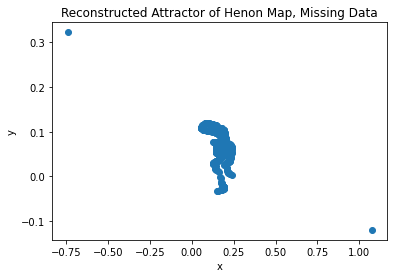

In [ ]:
plt.scatter(predicted_test[0,:],predicted_test[1,:])
plt.title("Reconstructed Attractor of Henon Map, Missing Data")
plt.xlabel("x")
plt.ylabel("y")

# Accounting for the missing data

Here we attempt to implement a potential solution to the problem, outlined by Boumediene Hamzi in the attached PDF file.



In [ ]:
# generate dataset
from scipy.stats import bernoulli
Data = Henon(T=200, dt=0.1,N_sims=1,a=1.4,b=0.3)[0]
#train test split
train_data = Data[:600,:]
#take random subset
#indices_random = np.sort(np.random.choice(600,300,replace=False))
#take train points corresponding to subset indices
#Times = np.linspace(1,2000-1,2000-1)
#train_times = Times[indices_random]
B = bernoulli.rvs(0.6,size=(600,1))
train_data = train_data*B

In [ ]:
times = np.argwhere(B == 1)[:,0]

In [ ]:
train_data=train_data.T

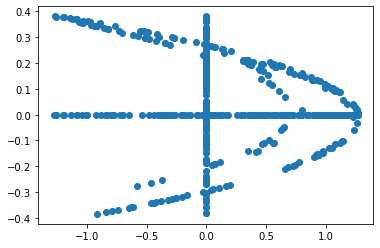

In [ ]:
plt.scatter(train_data[0,:],train_data[1,:])

In [ ]:
indices_random

array([  1,   3,   6,   7,   9,  12,  13,  17,  20,  21,  22,  23,  24,
        25,  26,  28,  33,  37,  40,  45,  46,  48,  49,  52,  54,  55,
        56,  57,  61,  62,  63,  70,  71,  75,  78,  79,  81,  82,  84,
        86,  89,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102,
       105, 106, 110, 116, 117, 119, 120, 122, 124, 126, 127, 129, 132,
       134, 135, 136, 139, 140, 145, 146, 147, 148, 149, 150, 154, 155,
       160, 161, 162, 163, 164, 165, 170, 171, 172, 173, 174, 179, 181,
       182, 185, 186, 187, 188, 189, 190, 191, 193, 194, 196, 198, 199,
       200, 202, 203, 204, 205, 206, 208, 210, 212, 214, 215, 216, 217,
       221, 224, 225, 226, 227, 230, 233, 236, 237, 238, 240, 241, 242,
       243, 247, 254, 255, 256, 257, 259, 261, 263, 266, 267, 269, 270,
       272, 273, 275, 276, 279, 280, 281, 284, 287, 288, 290, 291, 292,
       296, 297, 301, 302, 304, 305, 310, 311, 316, 317, 318, 319, 321,
       324, 326, 328, 330, 331, 332, 333, 334, 337, 349, 350, 35

parameters  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


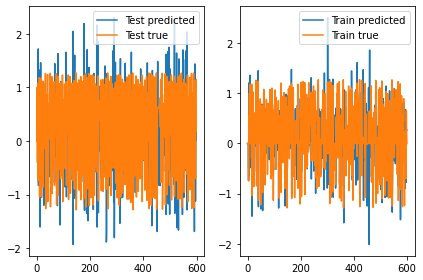

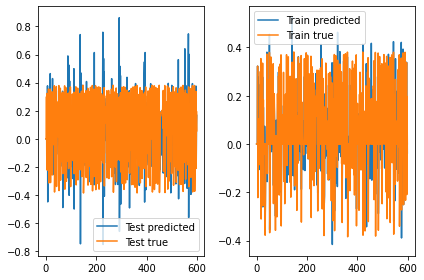

In [ ]:
np.random.seed(1)
from autograd import value_and_grad 
import math
import matplotlib.pyplot as plt
def sample_selection(data, size):
  indices = np.arange(data.shape[0])
  sample_indices = np.sort(np.random.choice(indices, size, replace= False)) 
  return sample_indices

def batch_creation(data, batch_size, sample_proportion = 0.5):
  if batch_size == False:
    data_batch = data
    batch_indices = np.arange(data.shape[0])
  elif 0 < batch_size <= 1:
    batch_size = int(data.shape[0] * batch_size)
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
  else:
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
        

    # Sample from the mini-batch
  sample_size = math.ceil(data_batch.shape[0]*sample_proportion)
  sample_indices = sample_selection(data_batch, sample_size)
    
  return sample_indices, batch_indices


# Generate a prediction
def kernel_regression(X_train, X_test, Y_train, param, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    t_matrix = kernel(X_test, X_train, param) 
    prediction = np.matmul(t_matrix, np.matmul(np.linalg.inv(k_matrix), Y_train)) 
    return prediction

# redicttimeseries

def kernel_extrapolate(X_train, X_test, Y_train, param, nsteps=1, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y_train)
    arr = np.array([])
    
    X_test0=X_test
    isteps=int(nsteps/(X_test.shape[1]))+1
    for i in range(isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, X_train, param) 
        prediction = np.matmul(t_matrix, A) 
        X_test0=prediction
        arr = np.append(arr, np.array(prediction[0,:]))
    arr=arr[0:nsteps]
    return arr


def replace_nan(array):
    for i in range(array.shape[0]):
        if math.isnan(array[i]) == True:
            print("Found nan value, replacing by 0")
            array[i] = 0
    return array

def sample_size_linear(iterations, range_tuple):
    
    return np.linspace(range_tuple[0], range_tuple[1], num = iterations)[::-1]
            
#%% Rho function

# The pi or selection matrix
def pi_matrix(sample_indices, dimension):
    pi = np.zeros(dimension)
    
    for i in range(dimension[0]):
        pi[i][sample_indices[i]] = 1
    
    return pi


def rho(parameters, matrix_data, Y_data, sample_indices,  kernel_keyword= "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    
    kernel_matrix = kernel(matrix_data, matrix_data, parameters)
#    print(kernel_matrix.shape)
    pi = pi_matrix(sample_indices, (sample_indices.shape[0], matrix_data.shape[0]))   
#    print(pi.shape)
    
    sample_matrix = np.matmul(pi, np.matmul(kernel_matrix, np.transpose(pi)))
#    print(sample_matrix.shape)
    
    Y_sample = Y_data[sample_indices]
#    print(Y_sample.shape)
    
    lambda_term = regu_lambda
    inverse_data = np.linalg.inv(kernel_matrix + lambda_term * np.identity(kernel_matrix.shape[0]))
    inverse_sample = np.linalg.inv(sample_matrix + lambda_term * np.identity(sample_matrix.shape[0]))
#    print(inverse_sample.shape)
#    B=np.matmul(inverse_sample, Y_sample)
#    print(B.shape)
    
    top = np.tensordot(Y_sample, np.matmul(inverse_sample, Y_sample))
    
   
    bottom = np.tensordot(Y_data, np.matmul(inverse_data, Y_data))
    
    #print(1-top/bottom)
    return 1 - top/bottom

def l2(parameters, matrix_data, Y, batch_indices, sample_indices, kernel_keyword = "RBF"):
    X_sample = matrix_data[sample_indices]
    Y_sample = Y[sample_indices]
    
    not_sample = [x for x in batch_indices not in sample_indices]
    X_not_sample = matrix_data[not_sample]
    Y_not_sample = Y[not_sample]
    prediction = kernel_regression(X_sample, X_not_sample, Y_sample, kernel_keyword)
    
    return np.dot(Y_not_sample - prediction, Y_not_sample- prediction)

#%% Grad functions

""" We define the gradient calculator function.Like rho, the gradient 
calculator function accesses the gradfunctions via a keyword"""

# Gradient calculator function. Returns an array
def grad_kernel(parameters, X_data, Y_data, sample_indices, kernel_keyword= "RBF", regu_lambda = 0.000001):
    grad_K = value_and_grad(rho)
    rho_value, gradient = grad_K(parameters, X_data, Y_data, sample_indices, kernel_keyword, regu_lambda = regu_lambda)
    return rho_value, gradient

#%% The class version of KF
class KernelFlowsP():
    
    def __init__(self, kernel_keyword, parameters):
        self.kernel_keyword = kernel_keyword
        self.parameters = np.copy(parameters)
        
        # Lists that keep track of the history of the algorithm
        self.rho_values = []
        self.grad_hist = []
        self.para_hist = []
        
        self.LR = 0.1
        self.beta = 0.9
        self.regu_lambda = 0.0001
    
    def get_hist(self):
        return self.param_hist, self.gradients, self.rho_values
        
    
    def save_model(self):
        np.save("param_hist", self.param_hist)
        np.save("gradients", self.gradients)
        np.save("rho_values", self.rho_values)
        
    def get_parameters(self):
        return self.parameters
    
    def set_LR(self, value):
        self.LR = value
        
    def set_beta(self, value):
        self.beta = value
    def set_train(self, train):
        self.train = train
        
    
    def fit(self, X, Y, iterations, batch_size = False, optimizer = "SGD", 
            learning_rate = 0.1, beta = 0.9, show_it = 100, regu_lambda = 0.000001, 
            adaptive_size = False, adaptive_range = (), proportion = 0.5, reduction_constant = 0.0):            

        self.set_LR(learning_rate)
        self.set_beta(beta)
        self.regu_lambda = regu_lambda
        
        self.X_train = np.copy(X)
        self.Y_train = np.copy(Y)
        momentum = np.zeros(self.parameters.shape, dtype = "float")
        
        # This is used for the adaptive sample decay
        rho_100 = []
        adaptive_mean = 0
        adaptive_counter = 0
        
        if adaptive_size == False or adaptive_size == "Dynamic":
            sample_size = proportion
        elif adaptive_size == "Linear":
            sample_size_array = sample_size_linear(iterations, adaptive_range) 
        else:
            print("Sample size not recognized")
            
        for i in range(iterations-1):
            if i % show_it == 0:
                print("parameters ", self.parameters)
            
            if adaptive_size == "Linear":
                sample_size = sample_size_array[i]
                
            elif adaptive_size == "Dynamic" and adaptive_counter == 100:
                if adaptive_mean != 0:
                    change = np.mean(rho_100) - adaptive_mean 
                else:
                    change = 0
                adaptive_mean = np.mean(rho_100)
                rho_100 = []
                sample_size += change - reduction_constant
                adaptive_counter= 0
                
            # Create a batch and a sample
            sample_indices, batch_indices = batch_creation(X, batch_size, sample_proportion = sample_size)
            X_data = X[batch_indices]
            Y_data = Y[batch_indices]
            

                
            # Changes parameters according to SGD rules
            if optimizer == "SGD":
                rho, grad_mu = grad_kernel(self.parameters, X_data, Y_data, 
                                           sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                #print(grad_mu)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    self.parameters -= learning_rate * grad_mu * (times[i+1]-times[i])
            
            # Changes parameters according to Nesterov Momentum rules     
            elif optimizer == "Nesterov":
                rho, grad_mu = grad_kernel(self.parameters - learning_rate * beta * momentum, 
                                               X_data, Y_data, sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    momentum = beta * momentum + grad_mu
                    self.parameters -= learning_rate * momentum * (times[i+1]-times[i])
                
            else:
                print("Error optimizer, name not recognized")
            
            # Update history 
            self.para_hist.append(np.copy(self.parameters))
            self.rho_values.append(rho)
            self.grad_hist.append(np.copy(grad_mu))
            
            rho_100.append(rho)
            adaptive_counter +=1
                
            
        # Convert all the lists to np arrays
        self.para_hist = np.array(self.para_hist) 
        self.rho_values = np.array(self.rho_values)
        self.grad_hist = np.array(self.grad_hist)
                
        return self.parameters
    
    def predict(self,test, regu_lambda = 0.0000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_regression(X_train, test, Y_train, self.parameters, self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

    def extrapolate(self,test, nsteps=1,regu_lambda = 0.000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_extrapolate(X_train, test, Y_train, self.parameters, nsteps,self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

def fit_data_anl3(train_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=train_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "SGD",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def fit_error_model_anl3(train_data,error_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=error_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "Nesterov",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def test_fit_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T

def test_error_model_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T



if __name__ == '__main__':
    #train_data = np.load('POD_Coeffs_train.npy')
    #test_data = np.load('POD_Coeffs_test.npy')

    # Set delay
    delay = 5
    regu_lambda = 10
    noptsteps = len(times)
    #noptsteps = len(train_times)

    # Fit on training data
    k_matrix, A, param, normalize, train_X = fit_data_anl3(train_data,delay,regu_lambda,noptsteps)

    # Predict and get error on training data
    predicted_train = test_fit_anl3(train_data, train_X, delay, k_matrix, A, param, normalize)


    #np.save('RKHS_Train_Prediction.npy',predicted_train)
    #train_error = np.abs(predicted_train-train_data)
    #np.save('RKHS_Train_Error.npy',train_error)
    #test_data= Data[:600,:].T

    # Predict testing data
    predicted_test = test_fit_anl3(test_data, train_X, delay, k_matrix, A, param, normalize)
    #np.save('RKHS_Test_Prediction.npy',predicted_test)
    test_error = np.abs(predicted_test-test_data)
   # np.save('RKHS_Test_Error.npy',train_error)

    # Visualize the modal predictions
    for mode_num in range(2):
        fig, ax = plt.subplots(nrows=1,ncols=2)
        ax[0].plot(predicted_test[mode_num,:],label='Test predicted')
        ax[0].plot(test_data[mode_num,:],label='Test true')
        ax[0].legend()

        ax[1].plot(predicted_train[mode_num,:],label='Train predicted')
        ax[1].plot(train_data[mode_num,:],label='Train true')
        ax[1].legend()
        plt.tight_layout()
        plt.show()

    #exit()

    # Fit an error model
    #k_matrix_err, A_err, param_err, normalize_err, train_X_err = fit_error_model_anl3(train_data,train_error,delay,regu_lambda,noptsteps)

    # Predict the error on train data
    #predicted_train_error = test_error_model_anl3(train_data, train_X_err, 
    #                                    delay, k_matrix_err, A_err, param_err, normalize_err)

    # Predict the error on test data
    #predicted_test_error = test_error_model_anl3(test_data, train_X_err, 
    #                                    delay, k_matrix_err, A_err, param_err, normalize_err)

As we can see, the attempted fix does not seem to work at the moment:

Text(0, 0.5, 'y')

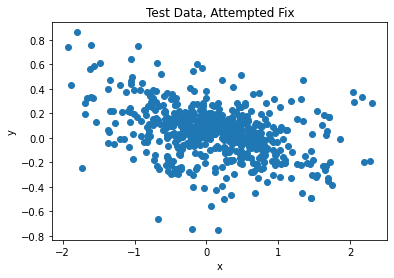

In [ ]:
plt.scatter(predicted_test[0,:],predicted_test[1,:])
plt.title("Test Data, Attempted Fix")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

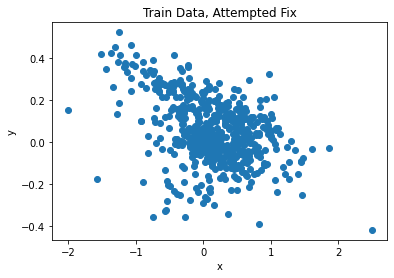

In [ ]:
plt.scatter(predicted_train[0,:],predicted_train[1,:])
plt.title("Train Data, Attempted Fix")
plt.xlabel("x")
plt.ylabel("y")

# Maximum mean discrepancy 

parameters  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Warning, rho outside [0,1]:  -0.002298519787764519
Warning, rho outside [0,1]:  -0.28906971139357474
Warning, rho outside [0,1]:  -0.03427338594337925
Warning, rho outside [0,1]:  -0.01871669735037429
Warning, rho outside [0,1]:  -0.0185024467722954
Warning, rho outside [0,1]:  -0.019502290672251732
Warning, rho outside [0,1]:  -0.02529769127490944
Warning, rho outside [0,1]:  -0.009210224298556113
Warning, rho outside [0,1]:  -0.09262249593783523
Warning, rho outside [0,1]:  -0.002435202865658681
Warning, rho outside [0,1]:  -0.026988147871448653
Warning, rho outside [0,1]:  -0.06699456985948071
Warning, rho outside [0,1]:  -0.015095718364436017
Warning, rho outside [0,1]:  -0.015979964388813883
Warning, rho outside [0,1]:  -0.04830289688470213
Warning, rho outside [0,1]:  -0.0513229184951598
Warning, rho outside [0,1]:  -0.03278451641166136
Warning, rho outside [0,1]:  -0.07310321151950205
Warning, 

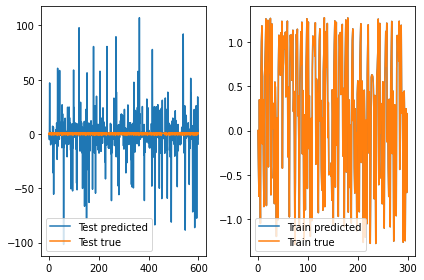

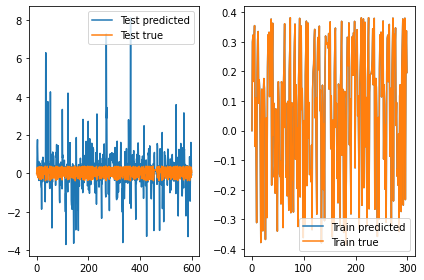

In [ ]:
np.random.seed(1)
from autograd import value_and_grad 
import math
import matplotlib.pyplot as plt
def sample_selection(data, size):
  indices = np.arange(data.shape[0])
  sample_indices = np.sort(np.random.choice(indices, size, replace= False)) 
  return sample_indices

def batch_creation(data, batch_size, sample_proportion = 0.5):
  if batch_size == False:
    data_batch = data
    batch_indices = np.arange(data.shape[0])
  elif 0 < batch_size <= 1:
    batch_size = int(data.shape[0] * batch_size)
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
  else:
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
        

    # Sample from the mini-batch
  sample_size = math.ceil(data_batch.shape[0]*sample_proportion)
  sample_indices = sample_selection(data_batch, sample_size)
    
  return sample_indices, batch_indices


# Generate a prediction
def kernel_regression(X_train, X_test, Y_train, param, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    t_matrix = kernel(X_test, X_train, param) 
    prediction = np.matmul(t_matrix, np.matmul(np.linalg.inv(k_matrix), Y_train)) 
    return prediction

# redicttimeseries

def kernel_extrapolate(X_train, X_test, Y_train, param, nsteps=1, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y_train)
    arr = np.array([])
    
    X_test0=X_test
    isteps=int(nsteps/(X_test.shape[1]))+1
    for i in range(isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, X_train, param) 
        prediction = np.matmul(t_matrix, A) 
        X_test0=prediction
        arr = np.append(arr, np.array(prediction[0,:]))
    arr=arr[0:nsteps]
    return arr


def replace_nan(array):
    for i in range(array.shape[0]):
        if math.isnan(array[i]) == True:
            print("Found nan value, replacing by 0")
            array[i] = 0
    return array

def sample_size_linear(iterations, range_tuple):
    
    return np.linspace(range_tuple[0], range_tuple[1], num = iterations)[::-1]
            
#%% Rho function

# The pi or selection matrix
def pi_matrix(sample_indices, dimension):
    pi = np.zeros(dimension)
    
    for i in range(dimension[0]):
        pi[i][sample_indices[i]] = 1
    
    return pi


def rho2(parameters, matrix_data, Y_data, sample_indices,  kernel_keyword= "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    
    kernel_matrix = kernel(matrix_data, matrix_data, parameters)
#    print(kernel_matrix.shape)
    pi = pi_matrix(sample_indices, (sample_indices.shape[0], matrix_data.shape[0]))   
#    print(pi.shape)
    
    sample_matrix = np.matmul(pi, np.matmul(kernel_matrix, np.transpose(pi)))
    
    Y_sample = Y_data[sample_indices]

    print(matrix_data.shape)

    
    lambda_term = regu_lambda
    inverse_data = np.linalg.inv(kernel_matrix + lambda_term * np.identity(kernel_matrix.shape[0]))
    inverse_sample = np.linalg.inv(sample_matrix + lambda_term * np.identity(sample_matrix.shape[0]))

    
    top = np.tensordot(Y_sample, np.matmul(inverse_sample, Y_sample))
    
   
    bottom = np.tensordot(Y_data, np.matmul(inverse_data, Y_data))
    
    #print(1-top/bottom)
    return 1 - top/bottom

def l2(parameters, matrix_data, Y, batch_indices, sample_indices, kernel_keyword = "RBF"):
    X_sample = matrix_data[sample_indices]
    Y_sample = Y[sample_indices]
    
    not_sample = [x for x in batch_indices not in sample_indices]
    X_not_sample = matrix_data[not_sample]
    Y_not_sample = Y[not_sample]
    prediction = kernel_regression(X_sample, X_not_sample, Y_sample, kernel_keyword)
    
    return np.dot(Y_not_sample - prediction, Y_not_sample- prediction)

#%% Grad functions

def rho(parameters,matrix_data, Y_data, sample_indices, kernel_keyword = "RBF", regu_lambda = 0.000001):

  kernel = kernels_dic[kernel_keyword]

  X_sample = matrix_data[sample_indices]
  Y_sample = Y_data[sample_indices]

    

  m = 50

  n = 50
  

  rho =   np.sum(kernel(X_sample,X_sample,parameters))/(m*m) +   np.sum(kernel(Y_sample,Y_sample,parameters))/(n*n)  - 2 * np.sum(kernel(X_sample,Y_sample,parameters))/(n*m)

  return rho



""" We define the gradient calculator function.Like rho, the gradient 
calculator function accesses the gradfunctions via a keyword"""

# Gradient calculator function. Returns an array
def grad_kernel(parameters, X_data, Y_data, sample_indices, kernel_keyword= "RBF", regu_lambda = 0.000001):
    grad_K = value_and_grad(rho)
    rho_value, gradient = grad_K(parameters, X_data, Y_data, sample_indices, kernel_keyword, regu_lambda = regu_lambda)
    return rho_value, gradient

#%% The class version of KF
class KernelFlowsP():
    
    def __init__(self, kernel_keyword, parameters):
        self.kernel_keyword = kernel_keyword
        self.parameters = np.copy(parameters)
        
        # Lists that keep track of the history of the algorithm
        self.rho_values = []
        self.grad_hist = []
        self.para_hist = []
        
        self.LR = 0.1
        self.beta = 0.9
        self.regu_lambda = 0.0001
    
    def get_hist(self):
        return self.param_hist, self.gradients, self.rho_values
        
    
    def save_model(self):
        np.save("param_hist", self.param_hist)
        np.save("gradients", self.gradients)
        np.save("rho_values", self.rho_values)
        
    def get_parameters(self):
        return self.parameters
    
    def set_LR(self, value):
        self.LR = value
        
    def set_beta(self, value):
        self.beta = value
    def set_train(self, train):
        self.train = train
        
    
    def fit(self, X, Y, iterations, batch_size = False, optimizer = "SGD", 
            learning_rate = 0.1, beta = 0.9, show_it = 100, regu_lambda = 0.000001, 
            adaptive_size = False, adaptive_range = (), proportion = 0.5, reduction_constant = 0.0):            

        self.set_LR(learning_rate)
        self.set_beta(beta)
        self.regu_lambda = regu_lambda
        
        self.X_train = np.copy(X)
        self.Y_train = np.copy(Y)
        momentum = np.zeros(self.parameters.shape, dtype = "float")
        
        # This is used for the adaptive sample decay
        rho_100 = []
        adaptive_mean = 0
        adaptive_counter = 0
        
        if adaptive_size == False or adaptive_size == "Dynamic":
            sample_size = proportion
        elif adaptive_size == "Linear":
            sample_size_array = sample_size_linear(iterations, adaptive_range) 
        else:
            print("Sample size not recognized")
            
        for i in range(iterations-1):
            if i % show_it == 0:
                print("parameters ", self.parameters)
            
            if adaptive_size == "Linear":
                sample_size = sample_size_array[i]
                
            elif adaptive_size == "Dynamic" and adaptive_counter == 100:
                if adaptive_mean != 0:
                    change = np.mean(rho_100) - adaptive_mean 
                else:
                    change = 0
                adaptive_mean = np.mean(rho_100)
                rho_100 = []
                sample_size += change - reduction_constant
                adaptive_counter= 0
                
            # Create a batch and a sample
            sample_indices, batch_indices = batch_creation(X, batch_size, sample_proportion = sample_size)
            X_data = X[batch_indices]
            Y_data = Y[batch_indices]
            

                
            # Changes parameters according to SGD rules
            if optimizer == "SGD":
                rho, grad_mu = grad_kernel(self.parameters, X_data, Y_data, 
                                           sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                #print(grad_mu)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    self.parameters -= learning_rate * grad_mu 
                    
            
            # Changes parameters according to Nesterov Momentum rules     
            elif optimizer == "Nesterov":
                rho, grad_mu = grad_kernel(self.parameters - learning_rate * beta * momentum, 
                                               X_data, Y_data, sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    momentum = beta * momentum + grad_mu
                    self.parameters -= learning_rate * momentum 
            else:
                print("Error optimizer, name not recognized")
            
            # Update history 
            self.para_hist.append(np.copy(self.parameters))
            self.rho_values.append(rho)
            self.grad_hist.append(np.copy(grad_mu))
            
            rho_100.append(rho)
            adaptive_counter +=1
                
            
        # Convert all the lists to np arrays
        self.para_hist = np.array(self.para_hist) 
        self.rho_values = np.array(self.rho_values)
        self.grad_hist = np.array(self.grad_hist)
                
        return self.parameters
    
    def predict(self,test, regu_lambda = 0.0000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_regression(X_train, test, Y_train, self.parameters, self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

    def extrapolate(self,test, nsteps=1,regu_lambda = 0.000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_extrapolate(X_train, test, Y_train, self.parameters, nsteps,self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

def fit_data_anl3(train_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=train_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "SGD",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def fit_error_model_anl3(train_data,error_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=error_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "Nesterov",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def test_fit_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T

def test_error_model_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T



if __name__ == '__main__':
    #train_data = np.load('POD_Coeffs_train.npy')
    #test_data = np.load('POD_Coeffs_test.npy')

    # Set delay
    delay = 2
    regu_lambda = 0.0
    #noptsteps = 5000
    noptsteps = 1000

    # Fit on training data
    k_matrix, A, param, normalize, train_X = fit_data_anl3(train_data,delay,regu_lambda,noptsteps)

    # Predict and get error on training data
    predicted_train = test_fit_anl3(train_data, train_X, delay, k_matrix, A, param, normalize)


    #np.save('RKHS_Train_Prediction.npy',predicted_train)
    #train_error = np.abs(predicted_train-train_data)
    #np.save('RKHS_Train_Error.npy',train_error)
    #test_data= Data[:600,:].T

    # Predict testing data
    predicted_test = test_fit_anl3(test_data, train_X, delay, k_matrix, A, param, normalize)
    #np.save('RKHS_Test_Prediction.npy',predicted_test)
    test_error = np.abs(predicted_test-test_data)
   # np.save('RKHS_Test_Error.npy',train_error)

    # Visualize the modal predictions
    for mode_num in range(2):
        fig, ax = plt.subplots(nrows=1,ncols=2)
        ax[0].plot(predicted_test[mode_num,:],label='Test predicted')
        ax[0].plot(test_data[mode_num,:],label='Test true')
        ax[0].legend()

        ax[1].plot(predicted_train[mode_num,:],label='Train predicted')
        ax[1].plot(train_data[mode_num,:],label='Train true')
        ax[1].legend()
        plt.tight_layout()
        plt.show()

    #exit()

    # Fit an error model
    #k_matrix_err, A_err, param_err, normalize_err, train_X_err = fit_error_model_anl3(train_data,train_error,delay,regu_lambda,noptsteps)

    # Predict the error on train data
    #predicted_train_error = test_error_model_anl3(train_data, train_X_err, 
    #                                    delay, k_matrix_err, A_err, param_err, normalize_err)

    # Predict the error on test data
    #predicted_test_error = test_error_model_anl3(test_data, train_X_err, 
    #                                    delay, k_matrix_err, A_err, param_err, normalize_err)

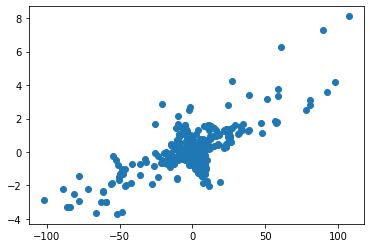

In [ ]:
plt.scatter(predicted_test[0,:].T,predicted_test[1,:].T)

In [ ]:
np.tensordot(np.matrix([[1,2],[3,4]]),np.matrix([[1,2],[3,4]]))

array(30)

# VDP

In [ ]:
def VDP(T, dt, N_sims, sigma, rho, random_theta=False):
    N_t  = int(T//dt)
    sims = np.zeros((N_sims, N_t, 2))
    cov  = dt * np.array(
            [[sigma**2,       sigma**2 * rho],
             [sigma**2 * rho, sigma**2]])
    dW   = np.random.multivariate_normal([0, 0], cov, size=(N_sims, N_t))
    for j in range(0,N_sims):
      for i in range(1,N_t):
        sims[j,i,0] = sims[j,(i-1),0] + 100*(sims[j,(i-1),1]-6.75*(sims[j,(i-1),0]+1)*sims[j,(i-1),0]**2)*dt + dW[j,i,0]
        sims[j,i,1] = sims[j,(i-1),1] + (-0.5-sims[j,(i-1),0])*dt + 0.1*dW[j,i,1]


    return sims.astype(np.float32)

In [ ]:
# generate dataset
Data = VDP(T=25, dt=0.0025,sigma=1.5,rho=0,N_sims=1)[0]
#train test split
observed_data= Data[0::2]
train_data = Data[:2000,:].T
test_data = Data[2000:,:].T
#times
Times = np.linspace(1,2000-1,2000-1)
#take random subset

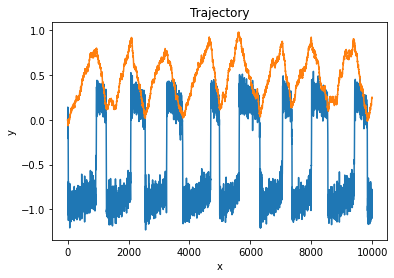

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Data)
plt.title("Trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
train_data

array([[ 0.0000000e+00,  0.0000000e+00, -3.1249999e-04, ...,
        -7.6085645e-01, -7.6041019e-01, -7.5996238e-01],
       [ 0.0000000e+00, -1.2500000e-03, -2.4999999e-03, ...,
         9.3626046e-01,  9.3691260e-01,  9.3756360e-01]], dtype=float32)

parameters  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
parameters  [ 0.98977188  1.10561053  1.28440107  0.18791783  0.80478308  1.07530307
  1.20103837  1.421978   -0.23274282  1.59782483  0.75235221  1.2423208
  0.9304742   1.19928664  1.05028503  0.98399974  0.87742402 -0.07031983
  0.68883764 -0.22003515  1.03296563 -7.31787683  2.13543239  0.28599518]


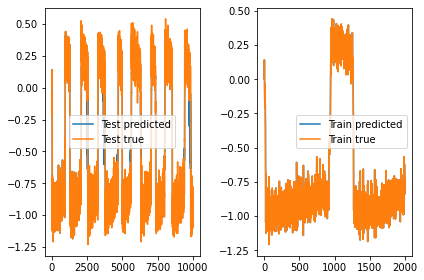

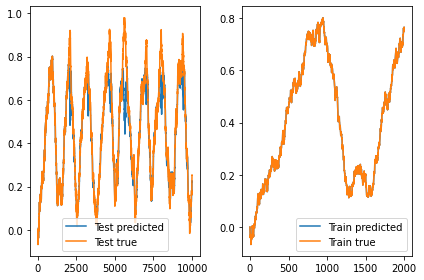

In [ ]:
np.random.seed(1)
from autograd import value_and_grad 
import math
import matplotlib.pyplot as plt
def sample_selection(data, size):
  indices = np.arange(data.shape[0])
  sample_indices = np.sort(np.random.choice(indices, size, replace= False)) 
  return sample_indices

def batch_creation(data, batch_size, sample_proportion = 0.5):
  if batch_size == False:
    data_batch = data
    batch_indices = np.arange(data.shape[0])
  elif 0 < batch_size <= 1:
    batch_size = int(data.shape[0] * batch_size)
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
  else:
    batch_indices = sample_selection(data, batch_size)
    data_batch = data[batch_indices]
        

    # Sample from the mini-batch
  sample_size = math.ceil(data_batch.shape[0]*sample_proportion)
  sample_indices = sample_selection(data_batch, sample_size)
    
  return sample_indices, batch_indices


# Generate a prediction
def kernel_regression(X_train, X_test, Y_train, param, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    t_matrix = kernel(X_test, X_train, param) 
    prediction = np.matmul(t_matrix, np.matmul(np.linalg.inv(k_matrix), Y_train)) 
    return prediction

# redicttimeseries

def kernel_extrapolate(X_train, X_test, Y_train, param, nsteps=1, kernel_keyword = "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    k_matrix = kernel(X_train, X_train, param)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y_train)
    arr = np.array([])
    
    X_test0=X_test
    isteps=int(nsteps/(X_test.shape[1]))+1
    for i in range(isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, X_train, param) 
        prediction = np.matmul(t_matrix, A) 
        X_test0=prediction
        arr = np.append(arr, np.array(prediction[0,:]))
    arr=arr[0:nsteps]
    return arr


def replace_nan(array):
    for i in range(array.shape[0]):
        if math.isnan(array[i]) == True:
            print("Found nan value, replacing by 0")
            array[i] = 0
    return array

def sample_size_linear(iterations, range_tuple):
    
    return np.linspace(range_tuple[0], range_tuple[1], num = iterations)[::-1]
            
#%% Rho function

# The pi or selection matrix
def pi_matrix(sample_indices, dimension):
    pi = np.zeros(dimension)
    
    for i in range(dimension[0]):
        pi[i][sample_indices[i]] = 1
    
    return pi


def rho(parameters, matrix_data, Y_data, sample_indices,  kernel_keyword= "RBF", regu_lambda = 0.000001):
    kernel = kernels_dic[kernel_keyword]
    
    kernel_matrix = kernel(matrix_data, matrix_data, parameters)
#    print(kernel_matrix.shape)
    pi = pi_matrix(sample_indices, (sample_indices.shape[0], matrix_data.shape[0]))   
#    print(pi.shape)
    
    sample_matrix = np.matmul(pi, np.matmul(kernel_matrix, np.transpose(pi)))
#    print(sample_matrix.shape)
    
    Y_sample = Y_data[sample_indices]
#    print(Y_sample.shape)
    
    lambda_term = regu_lambda
    inverse_data = np.linalg.inv(kernel_matrix + lambda_term * np.identity(kernel_matrix.shape[0]))
    inverse_sample = np.linalg.inv(sample_matrix + lambda_term * np.identity(sample_matrix.shape[0]))
#    print(inverse_sample.shape)
#    B=np.matmul(inverse_sample, Y_sample)
#    print(B.shape)
    
    top = np.tensordot(Y_sample, np.matmul(inverse_sample, Y_sample))
    
   
    bottom = np.tensordot(Y_data, np.matmul(inverse_data, Y_data))
    
    #print(1-top/bottom)
    return 1 - top/bottom




def l2(parameters, matrix_data, Y, batch_indices, sample_indices, kernel_keyword = "RBF"):
    X_sample = matrix_data[sample_indices]
    Y_sample = Y[sample_indices]
    
    not_sample = [x for x in batch_indices not in sample_indices]
    X_not_sample = matrix_data[not_sample]
    Y_not_sample = Y[not_sample]
    prediction = kernel_regression(X_sample, X_not_sample, Y_sample, kernel_keyword)
    
    return np.dot(Y_not_sample - prediction, Y_not_sample- prediction)

#%% Grad functions

""" We define the gradient calculator function.Like rho, the gradient 
calculator function accesses the gradfunctions via a keyword"""

# Gradient calculator function. Returns an array
def grad_kernel(parameters, X_data, Y_data, sample_indices, kernel_keyword= "RBF", regu_lambda = 0.000001):
    grad_K = value_and_grad(rho)
    rho_value, gradient = grad_K(parameters, X_data, Y_data, sample_indices, kernel_keyword, regu_lambda = regu_lambda)
    return rho_value, gradient

#%% The class version of KF
class KernelFlowsP():
    
    def __init__(self, kernel_keyword, parameters):
        self.kernel_keyword = kernel_keyword
        self.parameters = np.copy(parameters)
        
        # Lists that keep track of the history of the algorithm
        self.rho_values = []
        self.grad_hist = []
        self.para_hist = []
        
        self.LR = 0.1
        self.beta = 0.9
        self.regu_lambda = 0.0001
    
    def get_hist(self):
        return self.param_hist, self.gradients, self.rho_values
        
    
    def save_model(self):
        np.save("param_hist", self.param_hist)
        np.save("gradients", self.gradients)
        np.save("rho_values", self.rho_values)
        
    def get_parameters(self):
        return self.parameters
    
    def set_LR(self, value):
        self.LR = value
        
    def set_beta(self, value):
        self.beta = value
    def set_train(self, train):
        self.train = train
        
    
    def fit(self, X, Y, iterations, batch_size = False, optimizer = "SGD", 
            learning_rate = 0.1, beta = 0.9, show_it = 100, regu_lambda = 0.000001, 
            adaptive_size = False, adaptive_range = (), proportion = 0.5, reduction_constant = 0.0):            

        self.set_LR(learning_rate)
        self.set_beta(beta)
        self.regu_lambda = regu_lambda
        
        self.X_train = np.copy(X)
        self.Y_train = np.copy(Y)
        momentum = np.zeros(self.parameters.shape, dtype = "float")
        
        # This is used for the adaptive sample decay
        rho_100 = []
        adaptive_mean = 0
        adaptive_counter = 0
        
        if adaptive_size == False or adaptive_size == "Dynamic":
            sample_size = proportion
        elif adaptive_size == "Linear":
            sample_size_array = sample_size_linear(iterations, adaptive_range) 
        else:
            print("Sample size not recognized")
            
        for i in range(iterations-1):
            if i % show_it == 0:
                print("parameters ", self.parameters)
            
            if adaptive_size == "Linear":
                sample_size = sample_size_array[i]
                
            elif adaptive_size == "Dynamic" and adaptive_counter == 100:
                if adaptive_mean != 0:
                    change = np.mean(rho_100) - adaptive_mean 
                else:
                    change = 0
                adaptive_mean = np.mean(rho_100)
                rho_100 = []
                sample_size += change - reduction_constant
                adaptive_counter= 0
                
            # Create a batch and a sample
            #print(X.shape)
            sample_indices, batch_indices = batch_creation(X, batch_size, sample_proportion = sample_size)
            X_data = X[batch_indices]
            Y_data = Y[batch_indices]
            

                
            # Changes parameters according to SGD rules
            if optimizer == "SGD":
                rho, grad_mu = grad_kernel(self.parameters, X_data, Y_data, 
                                           sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                #print(grad_mu)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    self.parameters -= learning_rate * grad_mu 
                    #* (Times[i]-train_times[i])
                    
            
            # Changes parameters according to Nesterov Momentum rules     
            elif optimizer == "Nesterov":
                rho, grad_mu = grad_kernel(self.parameters - learning_rate * beta * momentum, 
                                               X_data, Y_data, sample_indices, self.kernel_keyword, regu_lambda = regu_lambda)
                if  rho > 1 or rho < 0:
                    print("Warning, rho outside [0,1]: ", rho)
                else:
                    momentum = beta * momentum + grad_mu
                    self.parameters -= learning_rate * momentum * (train_times[i]-train_times[i-1])
                
            else:
                print("Error optimizer, name not recognized")
            
            # Update history 
            self.para_hist.append(np.copy(self.parameters))
            self.rho_values.append(rho)
            self.grad_hist.append(np.copy(grad_mu))
            
            rho_100.append(rho)
            adaptive_counter +=1
                
            
        # Convert all the lists to np arrays
        self.para_hist = np.array(self.para_hist) 
        self.rho_values = np.array(self.rho_values)
        self.grad_hist = np.array(self.grad_hist)
                
        return self.parameters
    
    def predict(self,test, regu_lambda = 0.0000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_regression(X_train, test, Y_train, self.parameters, self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

    def extrapolate(self,test, nsteps=1,regu_lambda = 0.000001):
         
        X_train = self.X_train
        Y_train = self.Y_train
        prediction = kernel_extrapolate(X_train, test, Y_train, self.parameters, nsteps,self.kernel_keyword, regu_lambda = regu_lambda) 

        return prediction

def fit_data_anl3(train_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=train_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "SGD",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def fit_error_model_anl3(train_data,error_data,delay,regu_lambda,noptsteps=100):
    lenX=len(train_data[0,:])
    num_modes = train_data.shape[0]

    # Some constants
    nparameters=24
    vdelay=delay*np.ones((num_modes,), dtype=int)
    vregu_lambda=regu_lambda*np.ones((num_modes,))

    # Get scaling factor    
    normalize=np.amax(train_data[:,:])

    # Prepare training data
    X=np.zeros((1+lenX-2*delay,delay*num_modes))
    Y=np.zeros((1+lenX-2*delay,delay*num_modes))
    for mode in range(train_data.shape[0]):
        for i in range(1+lenX-2*delay):
              X[i,(mode*delay):(mode*delay+delay)]=train_data[mode,i:(i+delay)]
              Y[i,(mode*delay):(mode*delay+delay)]=error_data[mode,(i+delay):(i+2*delay)]

    # Normalize
    X=X/normalize
    Y=Y/normalize     
    
    # Fit data
    c=np.zeros(nparameters)+1
    mu_1 = c
    kerneltype="anl3"
    K = KernelFlowsP(kerneltype, mu_1)
    mu_pred = K.fit(X, Y, noptsteps, optimizer = "Nesterov",  batch_size = 100, show_it = 500, regu_lambda=regu_lambda)
    mu_1=mu_pred
    c=mu_1

    kernel = kernels_dic[kerneltype]
    k_matrix = kernel(X, X, mu_1)
    k_matrix += regu_lambda * np.identity(k_matrix.shape[0])
    A=np.matmul(np.linalg.inv(k_matrix), Y)

    return k_matrix, A, mu_1, normalize, X

def test_fit_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T

def test_error_model_anl3(test_data,train_X,delay,k_matrix,A,param,normalize):
    lenXt=len(test_data[0,:])
    num_modes = test_data.shape[0]

    nsteps=lenXt
    X_test=np.zeros((1,delay*num_modes))
    X_test[0,:] = test_data[:,:delay].reshape(1,-1)
    X_test=X_test/normalize
    
    arr = np.zeros((nsteps,num_modes))
    arr[:2*delay,:] = train_data[:,:2*delay].T/normalize

    kerneltype = "anl3"
    kernel = kernels_dic[kerneltype]

    X_test0=X_test
    isteps=int(nsteps/delay)+1
    for i in range(1,isteps):
        X_test1=X_test0
        t_matrix = kernel(X_test1, train_X, param) 
        prediction = np.matmul(t_matrix, A) 
        
        # Just using true data
        X_test0 = (test_data[:,i*delay:(i+1)*delay]/normalize).reshape(1,-1)

        # # Feedback
        # X_test0=prediction
        
        for mode in range(num_modes):
            imin=i*delay
            imax=np.minimum((i+1)*delay,nsteps)
            delaymin=imax-imin
            arr[imin:imax,mode]=np.array(prediction[0,(mode*delay):(mode*delay+delaymin)])

    # Rescale
    predall=arr*normalize

    return predall.T



if __name__ == '__main__':

    # Set delay
    delay = 10
    regu_lambda = 0.0010
    noptsteps = 1000

    # Fit on training data
    k_matrix, A, param, normalize, train_X = fit_data_anl3(train_data,delay,regu_lambda,noptsteps)

    # Predict and get error on training data
    predicted_train = test_fit_anl3(train_data, train_X, delay, k_matrix, A, param, normalize)

    # Predict testing data
    predicted_test = test_fit_anl3(test_data, train_X, delay, k_matrix, A, param, normalize)
    #test_error = np.abs(predicted_test-test_data)

    # Visualize the modal predictions
    for mode_num in range(2):
        fig, ax = plt.subplots(nrows=1,ncols=2)
        ax[0].plot(predicted_test[mode_num,:],label='Test predicted')
        ax[0].plot(Data.T[mode_num,:],label='Test true')
        ax[0].legend()

        ax[1].plot(predicted_train[mode_num,:],label='Train predicted')
        ax[1].plot(train_data[mode_num,:],label='Train true')
        ax[1].legend()
        plt.tight_layout()
        plt.show()


Text(0, 0.5, 'x2')

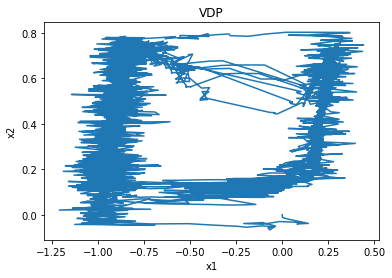

In [ ]:
plt.plot(predicted_test.T[:,0],predicted_test.T[:,1])
plt.title("VDP")
plt.xlabel("x1")
plt.ylabel("x2")

Text(0, 0.5, 'x2')

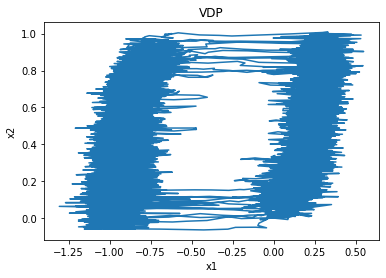

In [ ]:
plt.plot(Data[:,0],Data[:,1])
plt.title("VDP")
plt.xlabel("x1")
plt.ylabel("x2")

Text(0, 0.5, 'x')

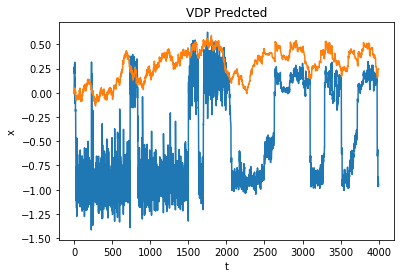

In [ ]:
plt.plot(predicted_test.T)
plt.title("VDP Predcted")
plt.xlabel("t")
plt.ylabel("x")

Text(0, 0.5, 'x')

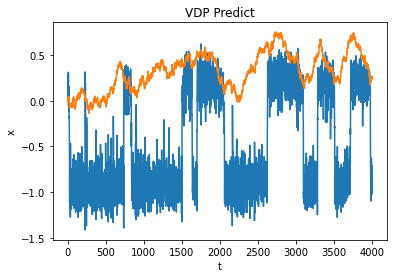

In [ ]:
plt.plot(Data)
plt.title("VDP Predict")
plt.xlabel("t")
plt.ylabel("x")